In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [32]:
data = pd.DataFrame(columns=['state', 'action', 'next_state', 'reward'])

In [519]:
class ReplayBuffer(object):
    def __init__(self, state_dim, action_dim, saved_buffer = None):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        
        if saved_buffer is not None:
            self.data = pd.read_csv(open(saved_buffer))
        else:
            self.data = pd.DataFrame(columns=['state', 'action', 'next_state', 'reward'])
    
    def store(self, state, action, next_state, reward):
        assert len(state) == self.state_dim , f"state dimension is wrong: expected size {self.state_dim}, get size {len(state)} instead"
        assert len(action) == self.action_dim , f"action dimension is wrong: expected size {self.action_dim}, get size {len(action)} instead"
        assert len(next_state) == self.state_dim , f"next_state dimension is wrong: expected size {self.state_dim}, get size {len(next_state)} instead"
        
        self.data.loc[len(self.data.index)] = [np.array(state).astype(float),np.array(action).astype(float), np.array(next_state).astype(float), float(reward)]
    
    def sample(self, batch_size):
        sampled_indx = np.random.randint(0, self.data.shape[0], size=batch_size)
        sampled_data = self.data.filter(items=sampled_indx, axis=0)
        
        return sampled_data['state'].to_numpy(),sampled_data['action'].to_numpy(), sampled_data['next_state'].to_numpy(), sampled_data['reward'].to_numpy()
    
    def plot_reward(self):
        plt.title("Reward over episode")
        plt.xlabel("Episode#")
        plt.ylabel("Reward")
        plt.plot(self.data['reward'],color="orange",linewidth=2.5)
    
    def dump(self):
        return self.data
    
    def dump_to_csv(self, filename="ReplayBuffer.csv"):
        print(f"#Dumping ReplayBuffer to {filename}#")
        self.data.to_csv(filename,index=False)
        
    def __str__(self):
        return f"ReplayBufer: {self.data.shape[0]} rows\n---------------------\n{self.data.head().to_string()}\n{self.data.tail().to_string()}"

In [507]:
rb = ReplayBuffer(3,6)

In [508]:
for i in range(20):
    rb.store([1,2,3],[1,2,3,4,5,6],[1,2,3],np.log(i+1))

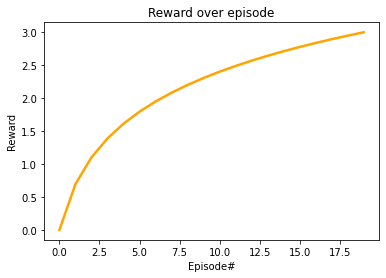

In [509]:
rb.plot_reward()

In [510]:
print(rb)

ReplayBufer: 20 rows
---------------------
             state                          action       next_state    reward
0  [1.0, 2.0, 3.0]  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]  [1.0, 2.0, 3.0]  0.000000
1  [1.0, 2.0, 3.0]  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]  [1.0, 2.0, 3.0]  0.693147
2  [1.0, 2.0, 3.0]  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]  [1.0, 2.0, 3.0]  1.098612
3  [1.0, 2.0, 3.0]  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]  [1.0, 2.0, 3.0]  1.386294
4  [1.0, 2.0, 3.0]  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]  [1.0, 2.0, 3.0]  1.609438
              state                          action       next_state    reward
15  [1.0, 2.0, 3.0]  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]  [1.0, 2.0, 3.0]  2.772589
16  [1.0, 2.0, 3.0]  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]  [1.0, 2.0, 3.0]  2.833213
17  [1.0, 2.0, 3.0]  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]  [1.0, 2.0, 3.0]  2.890372
18  [1.0, 2.0, 3.0]  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]  [1.0, 2.0, 3.0]  2.944439
19  [1.0, 2.0, 3.0]  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]  [1.0, 2.0, 3.0]  2.995732


In [511]:
action,state,nxt_state,reward = rb.sample(10)

In [512]:
rb.dump()

,state,action,next_state,reward
0,"[1.0, 2.0, 3.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]","[1.0, 2.0, 3.0]",0.000000
1,"[1.0, 2.0, 3.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]","[1.0, 2.0, 3.0]",0.693147
2,"[1.0, 2.0, 3.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]","[1.0, 2.0, 3.0]",1.098612
3,"[1.0, 2.0, 3.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]","[1.0, 2.0, 3.0]",1.386294
4,"[1.0, 2.0, 3.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]","[1.0, 2.0, 3.0]",1.609438
5,"[1.0, 2.0, 3.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]","[1.0, 2.0, 3.0]",1.791759
6,"[1.0, 2.0, 3.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]","[1.0, 2.0, 3.0]",1.945910
7,"[1.0, 2.0, 3.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]","[1.0, 2.0, 3.0]",2.079442
8,"[1.0, 2.0, 3.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]","[1.0, 2.0, 3.0]",2.197225
9,"[1.0, 2.0, 3.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]","[1.0, 2.0, 3.0]",2.302585


In [513]:
rb.dump_to_csv()

#Dumping ReplayBuffer to ReplayBuffer.csv#


In [515]:
rb2 = ReplayBuffer(3,6,"ReplayBuffer.csv")

In [517]:
rb2.dump()

,state,action,next_state,reward
0,[1. 2. 3.],[1. 2. 3. 4. 5. 6.],[1. 2. 3.],0.000000
1,[1. 2. 3.],[1. 2. 3. 4. 5. 6.],[1. 2. 3.],0.693147
2,[1. 2. 3.],[1. 2. 3. 4. 5. 6.],[1. 2. 3.],1.098612
3,[1. 2. 3.],[1. 2. 3. 4. 5. 6.],[1. 2. 3.],1.386294
4,[1. 2. 3.],[1. 2. 3. 4. 5. 6.],[1. 2. 3.],1.609438
5,[1. 2. 3.],[1. 2. 3. 4. 5. 6.],[1. 2. 3.],1.791759
6,[1. 2. 3.],[1. 2. 3. 4. 5. 6.],[1. 2. 3.],1.945910
7,[1. 2. 3.],[1. 2. 3. 4. 5. 6.],[1. 2. 3.],2.079442
8,[1. 2. 3.],[1. 2. 3. 4. 5. 6.],[1. 2. 3.],2.197225
9,[1. 2. 3.],[1. 2. 3. 4. 5. 6.],[1. 2. 3.],2.302585


In [528]:
for i,batch in enumerate(zip(action,state,nxt_state,reward)):
    print(i,batch)

0 (array([1., 2., 3.]), array([1., 2., 3., 4., 5., 6.]), array([1., 2., 3.]), 2.772588722239781)
1 (array([1., 2., 3.]), array([1., 2., 3., 4., 5., 6.]), array([1., 2., 3.]), 2.302585092994046)
2 (array([1., 2., 3.]), array([1., 2., 3., 4., 5., 6.]), array([1., 2., 3.]), 1.791759469228055)
3 (array([1., 2., 3.]), array([1., 2., 3., 4., 5., 6.]), array([1., 2., 3.]), 2.833213344056216)
4 (array([1., 2., 3.]), array([1., 2., 3., 4., 5., 6.]), array([1., 2., 3.]), 1.6094379124341003)
5 (array([1., 2., 3.]), array([1., 2., 3., 4., 5., 6.]), array([1., 2., 3.]), 2.833213344056216)
6 (array([1., 2., 3.]), array([1., 2., 3., 4., 5., 6.]), array([1., 2., 3.]), 2.6390573296152584)
7 (array([1., 2., 3.]), array([1., 2., 3., 4., 5., 6.]), array([1., 2., 3.]), 2.995732273553991)
8 (array([1., 2., 3.]), array([1., 2., 3., 4., 5., 6.]), array([1., 2., 3.]), 2.9444389791664403)
9 (array([1., 2., 3.]), array([1., 2., 3., 4., 5., 6.]), array([1., 2., 3.]), 2.302585092994046)
